# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn
# !pip3 install missingpy
# !pip3 install urlextract
# !python -m spacy download en_core_web_sm
# Download en_core_web_sm for text analytics

## Main Function

/Users/thegeorgejoseph/opt/anaconda3/envs/proton/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Enter the path here : datasets/titanic.csv
Attempting to import 100 rows of the dataset
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 12 columns and 100 rows

DataFrame Succesfully imported

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Enter 'quit' to quit
What would you like to predict? : Survived
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : 
Key  Not found in the data
Preview can't be shown!!
Is the column 'PassengerId' an identification column? If yes, enter y : y
Identification column obtained
Do you think you have Successive Targets based on the current target? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3

No Columns removed
Would you like to remove any other ID,zip Code,Phone Numbers,UNIQUE lists, 
Or columns that have only one unique entry? If yes, enter the column names 

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Shape after Pearsons Correlation (179, 3)
num_df - (179, 3)
disc_df - (179, 5)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)
LAT_LONG_DF - (0, 0)
EMAIL_DF - (0, 0)
URL_DF - (0, 0)
Applying Target Encoding...
Target Encoding completed
Applying Scaling and Transformations on Validation Set...
Scaling and Transformation completed

This is final shape of X_test : (179, 8)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['Age', 'Ticket', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Embarked', 'Sex'], dtype='object')
Age         float64
Ticket      float64
Fare        float64
Parch       float64
Pclass      float64
SibSp       float64
Embarked    float64
Sex         float64
dtype: object


         Age    Ticket      Fare     Parch    Pclass     SibSp  Embarked  Sex
0   1.000000  0.650813  0.255895  0.723009  0.722909  0.571591  0.000000  0.0
1   1.000000  0.309552  0.943468  1.000000  1.000000  0.571591  1.000000  0.0
2   0.538967  0.657270  

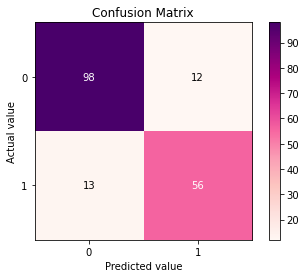

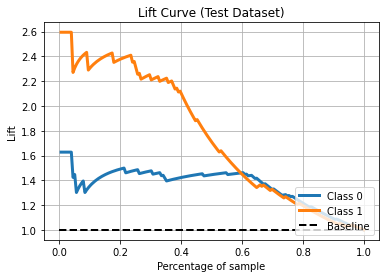

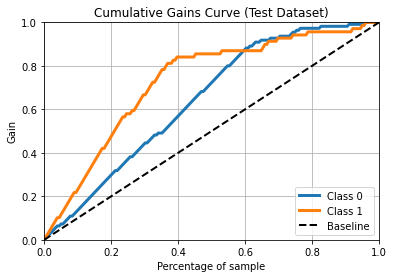

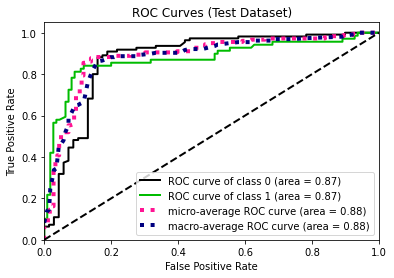

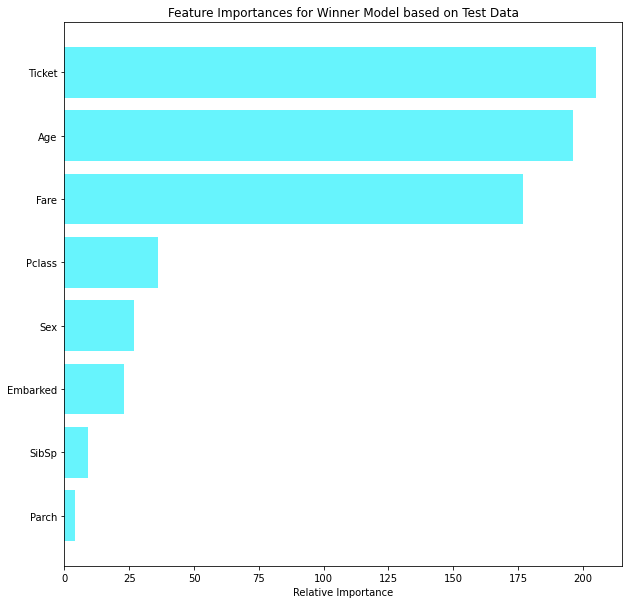

0 is present in 62% of the Testing Preview
1 is present in 38% of the Testing Preview


File Saved as preview.csv

Code executed Successfully

############# END ###########

	 #### CODE EXECUTED SUCCESSFULLY ####

	 #### END ####

#### TOTAL TIME TAKEN : 12.702318906784058 ####


In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import *
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        print("Attempting to import 100 rows of the dataset")
        try:
            df,csvPath = importFile(path,nrows=100)
        except ValueError:
            error_text = "Insufficient Data Error, Please collect more information"
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = duplicateHandler(df)
        df,update = dataHandler(df) # If first few rows contains unnecessary info
        df = duplicateHandler(df)
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = duplicateHandler(df)
            df,update = dataHandler(df,info['target']) 
            df = duplicateHandler(df)
            if update is True: #If columns are removed in dataHandler() 
                cols = df.columns.to_list()
                cols.remove(info['target'])
                info['cols'] = cols
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                target = info['target']
                print("###Performing Initial Numeric Engineering for Capping Purposes###")
#                 print("Initial columns",df.columns.to_list())
                dfsamp = df.sample(n=1000,random_state=1) if len(df)>1000 else df.copy()
                dfsamp = numeric_engineering(dfsamp)
                dfsamp = dfsamp.dropna(axis=0,subset=[target])
                print("###Estimating the type of target for Capping Purposes###")
                class_or_Reg = targetAnalysis(dfsamp[target])                    
                if class_or_Reg == 'Classification':
                    if len(df) >1000000:
                        df_train, _ = train_test_split(df, train_size=1000000,random_state=1, stratify=df[target])
                        print("Dataset size has been capped to 1 million rows for better performance")
                        print("Length of the dataset is now",len(df_train))
                        init_info,validation = INIT(df_train,info)
                    else:
                        print("Dataset has not been capped")
                        print("Length of the dataset is same as original",len(df))
                        init_info,validation = INIT(df,info)
                elif class_or_Reg == 'Regression':
                    dfr = df.sample(n=1000000, random_state=1) if len(df)>1000000 else df.copy()
                    print("Dataset size has been capped to 1 million rows for better performance")
                    print("Length of the dataset is now",len(dfr))
                    init_info,validation = INIT(dfr,info)
                elif class_or_Reg is None:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    try:
        if not init_info['eda_df'].empty:
            userInteractVisualization(init_info['eda_df'],info['target'])
    except Exception as e:
        print(f'{e}')
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

,PassengerId,Actual Values,Predicted Values,Class 0 Probabilities,Class 1 Probabilities
1,207,0,0,0.921,0.079
2,817,0,0,0.591,0.409
3,49,0,0,0.614,0.386
4,132,0,0,0.715,0.285
5,526,0,0,0.798,0.202
...,...,...,...,...,...
96,550,1,1,0.235,0.765
97,15,0,1,0.192,0.808
98,834,0,0,0.929,0.071
99,322,0,0,0.882,0.118


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

,Machine Learning Model,Accuracy%,Precision,Recall,Weighted F1,ROC_AUC_score,Kappa,MCC,KS_statistic,KS_p-value,Total time (hh:mm:ss)
1,Light Gradient Boosting Model,86.03%,0.860,0.860,0.860,0.851,0.704,0.704,0.006,1.000,00:00:00
2,CatBoost,83.24%,0.832,0.832,0.832,0.820,0.644,0.645,0.011,1.000,00:00:04
3,Ensemble (Light Gradient Boosting Model+Random Forest+Logistic Regression),82.68%,0.826,0.827,0.827,0.816,0.633,0.634,0.006,1.000,00:00:00
4,Random Forest,82.68%,0.827,0.827,0.823,0.802,0.623,0.629,0.061,0.889,00:00:00
5,XGBoost,81.56%,0.814,0.816,0.814,0.799,0.606,0.607,0.028,1.000,00:00:00
6,Support Vector Machine,80.45%,0.803,0.804,0.804,0.790,0.584,0.584,0.017,1.000,00:00:00
7,Logistic Regression,79.33%,0.797,0.793,0.795,0.789,0.570,0.570,0.028,1.000,00:00:00
8,Extra Trees Classifier,79.33%,0.791,0.793,0.792,0.775,0.558,0.559,0.028,1.000,00:00:00
9,Naive Bayes(Bayesisan Statistics),77.09%,0.769,0.771,0.769,0.752,0.510,0.511,0.028,1.000,00:00:00


In [5]:
# joblib.load('XT').min().min()


In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
